In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.plotly as py
from plotly.offline import init_notebook_mode ,iplot 
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['education_expenditure_supplementary_data.csv', 'cwurData.csv', 'shanghaiData.csv', 'school_and_country_table.csv', 'timesData.csv', 'educational_attainment_supplementary_data.csv']


In [26]:
timesData=pd.read_csv("../input/timesData.csv")

In [27]:
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [28]:
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null object
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2603 non-null object
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2603 non-null object
total_score               2603 non-null object
num_students              2544 non-null object
student_staff_ratio       2544 non-null float64
international_students    2536 non-null object
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(4), int64(1), object(9)
memory usage: 284.8+ KB


In [29]:
df=timesData.iloc[:100,:]

In [30]:
df.tail()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
95,95,University of Arizona,United States of America,52.4,21.9,52.2,70.1,84.2,57.3,"36,429",12.7,8%,52 : 48,2011
96,95,University of Basel,Switzerland,50.2,91.3,37.1,78.3,45.8,57.3,"12,551",17.3,24%,54 : 46,2011
97,98,"University of Maryland, College Park",United States of America,45.4,35.4,48.6,79.2,-,57.2,"31,331",8.4,9%,48 : 52,2011
98,99,Dartmouth College,United States of America,44.7,31.0,49.2,79.7,-,57.1,"6,178",6.6,16%,47 : 53,2011
99,100,École Normale Supérieure de Lyon,France,51.1,37.6,34.4,88.8,26.1,57.0,"2,218",8.0,14%,49 : 51,2011


**Line Plot**

In [31]:
trace1=go.Scatter(
x=df.world_rank,
y=df.citations,
mode="lines",
name="citations",
marker=dict(color='rgb(12,125,10,0.8)'),
text=df.university_name
)
trace2=go.Scatter(
x=df.world_rank,
y=df.teaching,
mode="lines+markers",
name="teaching",
marker=dict(color='rgb(125,12,10,0.7)'),
text=df.university_name)

data=[trace1,trace2]
layout=dict(title="",
           xaxis=dict(title='world rank',ticklen=5,zeroline=False))
fig=dict(data=data,layout=layout)
iplot(fig)

**Scatter Plot**

In [32]:
df14=timesData[timesData.year==2014].iloc[:100,:]
df15=timesData[timesData.year==2015].iloc[:100,:]
df16=timesData[timesData.year==2016].iloc[:100,:]

trace1=go.Scatter(
    x=df14.world_rank,
    y=df14.citations,
    mode="markers",
    name="2014",
    marker=dict(color='rgb(125,125,25,0.7)'),
    text=df14.university_name)

trace2=go.Scatter(
    x=df15.world_rank,
    y=df15.citations,
    mode="markers",
    name="2015",
    marker=dict(color='rgb(25,125,125)'),
    text=df15.university_name)

trace3=go.Scatter(
    x=df16.world_rank,
    y=df16.citations,
    mode="markers",
    name="2016",
    marker=dict(color='rgb(125,25,125)'),
    text=df16.university_name)

data=[trace1,trace2,trace3]
layout=dict(title="2014-2015-2016",
           xaxis=dict(title="world rank",ticklen=10,zeroline=True),
           yaxis=dict(title="Citations",ticklen=5,zeroline=False))
fig=dict(data=data, layout=layout)
iplot(fig)

**Bar Plot**

In [33]:
df2014=timesData[timesData.year==2014].iloc[:3,:]

trace1=go.Bar(
x=df2014.university_name,
y=df2014.citations,
name="citations",
marker=dict(color='rgb(100,100,75,0.8)'),
text=df2014.country
)

trace2=go.Bar(
    x=df2014.university_name,
    y=df2014.teaching,
    name="teaching",
    marker=dict(color='rgb(45,125,180,0.7)'),
    text=df2014.country)

data=[trace1,trace2]

layout=go.Layout(barmode="group")
fig=go.Figure(data=data,layout=layout)
iplot(fig)

**Bar Plot S2**

In [34]:
x=df2014.university_name

trace1={
    'x':x,
    'y':df2014.citations,
    'name':'citation',
    'type':'bar'
};

trace2={
    'x':x,
    'y':df2014.teaching,
    'name':'teaching',
    'type':'bar'
};

data=[trace1,trace2];
layout=go.Layout(barmode='relative')
fig=go.Figure(data=data,layout=layout)
iplot(fig)

**Pie Plot**

In [35]:
df2016=timesData[timesData.year==2016].iloc[:7,:]
pie1=df2016.num_students
pie1_list=[float(each.replace(',','.')) for each in df2016.num_students]
labels=df2016.university_name

fig={
    "data":[
        {
        "values":pie1_list,
        "labels":labels,
        "domain":{"x":[0,.5]},
        "name":"Number of Students Rates",
        "hoverinfo":"label+percent+name",
        "hole":0.2,
        "type":"pie"
    },],
    "layout":{
        "title":"Universities Number of Students Rates",
        "annotations":[
            {
                "font":{"size":20},
                "showarrow":False,
                "text":"Number of Stundets",
                "x":0.20,
                "y":1
            }
        ]
    }
}
iplot(fig)

**Bubble Plot**

In [36]:
df2016=timesData[timesData.year==2016].iloc[:20,:]
num_student_size=[float(each.replace(',','.'))for each in df2016.num_students]
international_color=[float(each) for each in df2016.international]

data=[
    {
        'x':df2016.world_rank,
        'y':df2016.teaching,
        'mode':'markers',
        'marker':{
            'color':international_color,
            'size':num_student_size,
            'showscale':True
            
        },
        'text':df2016.university_name
    }
]
iplot(data)

**Histogram **

In [37]:
x2013=timesData.student_staff_ratio[timesData.year==2013]
x2014=timesData.student_staff_ratio[timesData.year==2014]

trc1=go.Histogram(
    x=x2013,
    opacity=0.7,
    name="2013",
    marker=dict(color='rgba(125,7,21,0.8)')
    
)

trc2=go.Histogram(
    x=x2014,
    opacity=0.6,
    name="2014",
    marker=dict(color='rgba(21,25,147,0.2)')
)
data=[trc1,trc2]
layout=go.Layout(barmode="overlay",
                title="Students-Staff Ratio 2013-2014",
                xaxis=dict(title='Students-Staff Ratio'),
                yaxis=dict(title="Count"))
fig=go.Figure(data=data,layout=layout)
iplot(fig)

**Word Cloud**

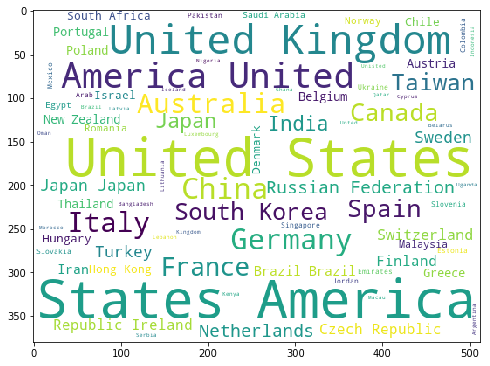

In [38]:
x2016=timesData.country[timesData.year==2016]
plt.subplots(figsize=(8,8))
wordCloud=WordCloud(
background_color='white',
width=512,
height=380,
).generate(" ".join(x2016))
plt.imshow(wordCloud)
plt.axis=('off')



**Box Plot**

In [39]:
x2015=timesData[timesData.year==2015]

trace1=go.Box(
    y=x2015.total_score,
    name="Total Score of Universities in 2015",
    marker=dict(color='rgba(36,25,14,0.8)')
)

trace2=go.Box(
    y=x2015.research,
    name="research of Universities in 2015",
    marker=dict(color='rgba(14,25,136,0.6)')
)
data=[trace1,trace2]
iplot(data)

**Scatter Matrix**

In [40]:
import plotly.figure_factory as ff


In [41]:
dataframe=timesData[timesData.year==2015]
data2015=dataframe.loc[:,["research","international","total_score"]]
data2015["index"]=np.arange(1,len(data2015)+1)

fig=ff.create_scatterplotmatrix(data2015,diag="box",index="index",colormap="Portland",
                                colormap_type='cat',
                               height=700, width=800)
iplot(fig)

**Inset Plot**

In [42]:
trace1=go.Scatter(
x=dataframe.world_rank,
y=dataframe.teaching,
name="teaching",
marker=dict(color='rgba(210,10,15,0.7)')
)

trace2=go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis="x2",
    yaxis="y2",
    name="income",
    marker=dict(color='rgba(15,210,10,0.8)')
)
data=[trace1,trace2]

layout=go.Layout(
    xaxis2 =dict(
        domain=[0.6,0.95],
    anchor='y2'
    ),
    yaxis2=dict(
    domain=[0.6,0.95],
    anchor='x2'),
    
    title="income and Teaching vs World Rank of Universities"
)

fig=go.Figure(data=data, layout=layout)
iplot(fig)

**3D Scatter Plot**

In [45]:
trace1=go.Scatter3d(
    x=dataframe.world_rank,
    y=dataframe.research,
    z=dataframe.citations,
    mode="markers",
    marker=dict(
        size=5,
        color="green",
    )
)

data=[trace1]

layout=go.Layout(margin=dict(
l=0,
r=0,
b=0,
t=0))

fig=go.Figure(data=data, layout=layout)

iplot(fig)

**Multiple Subplots**

In [57]:
trc1=go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.research,
    name="research"
)

trc2=go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.citations,
    xaxis="x2",
    yaxis="y2",
    name="citations"
)
trc3=go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis="x3",
    yaxis="y3",
    name="income"

)

trc4=go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.total_score,
    xaxis="x4",
    yaxis="y4",
    name="total_score"
)

data=[trc1,trc2,trc3,trc4]

layout=go.Layout(
    xaxis=dict(
    domain=[0,0.45]
    ),
    
    yaxis=dict(domain=[0,0.45]),
    
    xaxis2=dict(domain=[0.55,1]),
    
    xaxis3=dict(domain=[0,0.45],
                anchor="y3"),
    
    xaxis4=dict(domain=[0.55,1],
               anchor="y4"),
    
    yaxis2=dict(domain=[0,0.45],
               anchor="x2"),
    

    yaxis3=dict(domain=[0.55,1]),
    

    yaxis4=dict(domain=[0.55,1],
               anchor="x4"),
    
    title="Research, Citation, İncome and Total Score vs World Rank"
    
)
fig=go.Figure(data=data,layout=layout)
iplot(fig)